In [15]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("divarofficial/real_estate_ads")

In [16]:
# Print the first few examples
print(dataset['train'][:5])

# Get dataset statistics
print(f"Dataset size: {len(dataset['train'])} rows")
print(f"Features: {dataset['train'].features}")


{'cat2_slug': ['temporary-rent', 'residential-sell', 'residential-rent', 'commercial-rent', 'residential-sell'], 'cat3_slug': ['villa', 'apartment-sell', 'apartment-rent', 'office-rent', 'apartment-sell'], 'city_slug': ['karaj', 'tehran', 'tehran', 'tehran', 'mashhad'], 'neighborhood_slug': ['mehrshahr', 'gholhak', 'tohid', 'elahiyeh', 'emamreza'], 'created_at_month': ['2024-08-01 00:00:00', '2024-05-01 00:00:00', '2024-10-01 00:00:00', '2024-06-01 00:00:00', '2024-05-01 00:00:00'], 'user_type': ['مشاور املاک', 'مشاور املاک', None, None, 'مشاور املاک'], 'description': ['۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم داخل\nسیستم صوتی حرفه ای\nسرگرمی ایرهاکی\nبرای اطلاعات بیشتر تماس حاصل فرماید', 'دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nبدون ایراد \nآخرین بازدید \nفروشنده واقعی\nشایان', 'تخلیه پایان ماه', 'فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق مستر\nدید و وییو مشجر\nروبه باغ\nنور و نقشه عالی\nلابی و لابی من و سرایدار مقیم\nلوکس و شیک\nمدرن\nهمه مشاغل\nبازدید = با قرار داد\nف

In [17]:
df = dataset['train'].to_pandas()

# df.info()
# df.describe()

def to_bool(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if x in ['true', 'yes', '1', 'دارم']:  # Add any positive values here
            return True
        elif x in ['false', 'no', '0', 'ندارم']:  # Add negative values here
            return False
    elif pd.isna(x):
        return pd.NA  # preserve missing
    return pd.NA  # fallback to missing for anything else

# Get all columns starting with 'has_'
bool_cols = [col for col in df.columns if col.startswith('has_')]

for col in bool_cols:
    df[col] = df[col].apply(to_bool).astype('boolean')  # nullable boolean dtype

print(df[bool_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   has_business_deed        0 non-null       boolean
 1   has_balcony              506188 non-null  boolean
 2   has_elevator             0 non-null       boolean
 3   has_warehouse            0 non-null       boolean
 4   has_parking              0 non-null       boolean
 5   has_water                0 non-null       boolean
 6   has_warm_water_provider  0 non-null       boolean
 7   has_electricity          0 non-null       boolean
 8   has_gas                  0 non-null       boolean
 9   has_heating_system       0 non-null       boolean
 10  has_cooling_system       0 non-null       boolean
 11  has_restroom             0 non-null       boolean
 12  has_security_guard       0 non-null       boolean
 13  has_barbecue             0 non-null       boolean
 14  has

In [18]:
missing_rates = df.isnull().mean()
print(missing_rates)

cat2_slug                     0.000000
cat3_slug                     0.000001
city_slug                     0.000002
neighborhood_slug             0.562861
created_at_month              0.000000
user_type                     0.711118
description                   0.000000
title                         0.000054
rent_mode                     0.647006
rent_value                    0.648678
rent_to_single                0.999981
rent_type                     0.896039
price_mode                    0.426394
price_value                   0.431654
credit_mode                   0.647006
credit_value                  0.647905
rent_credit_transform         0.647015
transformable_price           0.647106
transformable_credit          0.647915
transformed_credit            0.927591
transformable_rent            0.648752
transformed_rent              0.927591
land_size                     0.813604
building_size                 0.019606
deed_type                     0.746542
has_business_deed        

In [19]:
# at first this value was 90% and it removed 26 cols
# but since a lot of remaining data had missing rate of
# more than 50% and where useless decided to make it 50%  
threshold = 0.5

missing_rates = df.isnull().mean()

cols_to_drop = missing_rates[missing_rates > threshold].index.tolist()

df.drop(columns=cols_to_drop, inplace=True)

# report
print(f"Columns dropped due to missing rate > {threshold*100:.0f}%: {len(cols_to_drop)}")
print("Dropped columns:")
print(cols_to_drop)

print("\nCurrent DataFrame info:")
print(df.info())

print("\nCurrent missing rates summary:")
print(df.isnull().mean())

Columns dropped due to missing rate > 50%: 44
Dropped columns:
['neighborhood_slug', 'user_type', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type', 'credit_mode', 'credit_value', 'rent_credit_transform', 'transformable_price', 'transformable_credit', 'transformed_credit', 'transformable_rent', 'transformed_rent', 'land_size', 'deed_type', 'has_business_deed', 'total_floors_count', 'unit_per_floor', 'has_elevator', 'has_warehouse', 'has_parking', 'has_water', 'has_warm_water_provider', 'has_electricity', 'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom', 'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool', 'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type', 'regular_person_capacity', 'extra_person_capacity', 'cost_per_extra_person', 'rent_price_on_regular_days', 'rent_price_on_special_days', 'rent_price_at_weekends', 'location_radius']

Current DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 t

As a result we now have 16 features remaining to work with that have `missing_rate` of less than 50%.

What is conserning is that `price_value` itself is missing in more than 43% of records.

In [20]:
df['price_missing'] = df['price_value'].isna()

cat_cols = ['cat2_slug', 'cat3_slug', 'city_slug', 'created_at_month']

for col in cat_cols:
    missing_dist = df.groupby(col)['price_missing'].mean().sort_values(ascending=False)
    print(f"Missing price rate per {col}:\n{missing_dist}\n")

Missing price rate per cat2_slug:
cat2_slug
residential-rent        0.999978
temporary-rent          0.999833
commercial-rent         0.999556
real-estate-services    0.937639
commercial-sell         0.173284
residential-sell        0.042498
Name: price_missing, dtype: float64

Missing price rate per cat3_slug:
cat3_slug
apartment-rent                        0.999981
house-villa-rent                      0.999969
villa                                 0.999922
suite-apartment                       0.999879
office-rent                           0.999720
shop-rent                             0.999500
industry-agriculture-business-rent    0.999454
partnership                           0.998343
workspace                             0.996289
presell                               0.923706
industry-agriculture-business-sell    0.233145
plot-old                              0.177690
shop-sell                             0.150812
office-sell                           0.130941
house-villa-sell   

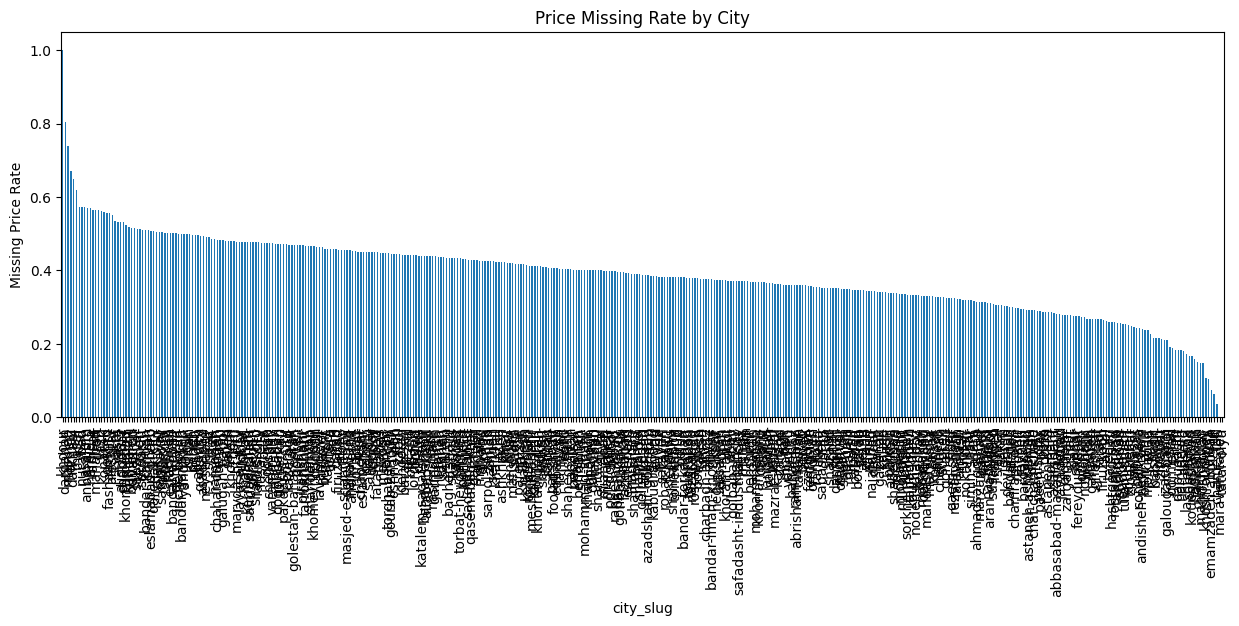

In [21]:
import matplotlib.pyplot as plt

city_missing = df.groupby('city_slug')['price_missing'].mean().sort_values(ascending=False)
city_missing.plot(kind='bar', figsize=(15,5), title='Price Missing Rate by City')
plt.ylabel('Missing Price Rate')
plt.show()

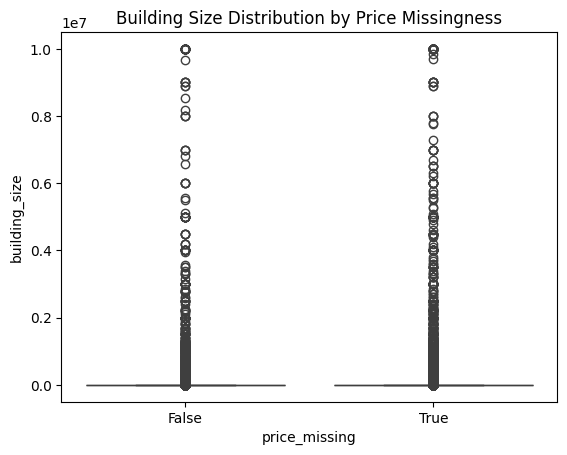

In [22]:
import seaborn as sns

sns.boxplot(x='price_missing', y='building_size', data=df)
plt.title('Building Size Distribution by Price Missingness')
plt.show()

In [24]:
persian_to_int = {
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار': 4,
    'پنج': 5,
    'شش': 6,
    'هفت': 7,
    'هشت': 8,
    'نه': 9,
    'ده': 10
}

df['rooms_count_num'] = df['rooms_count'].map(persian_to_int)

df['price_missing_num'] = df['price_missing'].astype(int)
numeric_cols = ['building_size', 'location_latitude', 'location_longitude', 'rooms_count_num']

corrs = df[numeric_cols + ['price_missing_num']].corr()['price_missing_num'].sort_values(ascending=False)
print("Correlation of numeric columns with price missingness:\n", corrs)

Correlation of numeric columns with price missingness:
 price_missing_num     1.000000
location_longitude    0.028023
building_size         0.016274
location_latitude    -0.042673
rooms_count_num      -0.104612
Name: price_missing_num, dtype: float64
